In [ ]:
import requests
import pandas as pd
import sqlite3
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
# читаем файл
df = pd.read_csv("dt.csv")
# коннект к SQLite БД


# функция получения данных по вакансии
def get_vacancy_details(vacancy_id):
    url = f"https://api.hh.ru/vacancies/{vacancy_id}"
    headers = {
        'User-Agent': 'api-test-agent'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# основной цикл
for index, row in df.iterrows():
    vacancy_id = row["ID"]
    vacancy_data = get_vacancy_details(vacancy_id)
    if vacancy_data:
        description = vacancy_data.get('description')

        key_skills = vacancy_data.get('key_skills')
        if key_skills:
            skills = ', '.join([skill['name'] for skill in key_skills])
           
        else:
            skills = None
        # добавляем или обновляем запись по ID
        df.at[index, 'key_skills'] = skills
        print(f"Вакансия {vacancy_id} успешно добавлена/обновлена.")
    else:
        print(f"Не удалось получить вакансию {vacancy_id}")

    time.sleep(1)  # чтобы не словить лимит HH API

# закрываем соединение


print("Готово!")


Вакансия 121099307 успешно добавлена/обновлена.
Вакансия 121046356 успешно добавлена/обновлена.
Вакансия 121069532 успешно добавлена/обновлена.
Вакансия 121027154 успешно добавлена/обновлена.
Вакансия 121054028 успешно добавлена/обновлена.
Вакансия 120983185 успешно добавлена/обновлена.
Вакансия 121023574 успешно добавлена/обновлена.
Вакансия 120974196 успешно добавлена/обновлена.
Вакансия 120593424 успешно добавлена/обновлена.
Вакансия 117007345 успешно добавлена/обновлена.
Вакансия 121062562 успешно добавлена/обновлена.
Вакансия 120964056 успешно добавлена/обновлена.
Вакансия 120647195 успешно добавлена/обновлена.
Вакансия 120593430 успешно добавлена/обновлена.
Вакансия 121086184 успешно добавлена/обновлена.
Вакансия 120478683 успешно добавлена/обновлена.
Вакансия 121062867 успешно добавлена/обновлена.
Вакансия 120865326 успешно добавлена/обновлена.
Вакансия 120998938 успешно добавлена/обновлена.
Вакансия 120911612 успешно добавлена/обновлена.
Вакансия 120570784 успешно добавлена/обн

KeyboardInterrupt: 

In [4]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# читаем файл
df = pd.read_csv("dt.csv")

# функция получения key_skills по вакансии
def fetch_skills(vacancy_id):
    url = f"https://api.hh.ru/vacancies/{vacancy_id}"
    headers = {
        'User-Agent': 'api-test-agent'
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            vacancy_data = response.json()
            key_skills = vacancy_data.get('key_skills')
            if key_skills:
                return vacancy_id, list(', '.join([skill['name'] for skill in key_skills]))
        return vacancy_id, None
    except Exception as e:
        print(f"Ошибка для вакансии {vacancy_id}: {e}")
        return vacancy_id, None

# создаём пустую колонку
df['Навыки'] = None

# создаём пул потоков
with ThreadPoolExecutor(max_workers=10) as executor:
    # запускаем задачи
    futures = {executor.submit(fetch_skills, vacancy_id): vacancy_id for vacancy_id in df['ID']}
    
    for future in as_completed(futures):
        vacancy_id, skills = future.result()
        # вставляем в DataFrame по индексу
        df.loc[df['ID'] == vacancy_id, 'Навыки'] = skills

# сохраняем обновлённый файл
df.to_csv("dt_with_skills_parallel.csv", index=False)
df.to_excel("dt_with_skills_parallel.xlsx", index=False)
print("Готово с потоками!")


Ошибка для вакансии 120922871: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)
Ошибка для вакансии 121098365: HTTPSConnectionPool(host='api.hh.ru', port=443): Read timed out. (read timeout=10)


ValueError: Must have equal len keys and value when setting with an iterable

In [5]:
import requests
import pandas as pd
df = pd.read_csv('dt_with_skills_parallel.csv')
df = df.dropna()
df

,Название,Компания,Требования,Обязаности,Зарплата,Опыт работы,Ссылка,ID,Навыки
2,Мобильный системный инженер,Союз 76,Опыт работы в аналогичной сфере приветствуется...,Обслуживание IT-оборудования на объектах заказ...,100000 - 200000 RUR,От 1 года до 3 лет,https://hh.ru/vacancy/121069532,121069532,"Настройка ПК, Администрирование сетевого обору..."
5,Специалист по защите информации,Министерство цифрового развития и связи Оренбу...,"Будет Вашим преимуществом, если Вы: - имеете о...",работа на первой линии технической поддержки с...,68000 - RUR,Нет опыта,https://hh.ru/vacancy/120983185,120983185,"КриптоПро, VipNet, VipnetCoordinator, Информац..."
8,Специалист по информационной безопасности (ИБ),Кортекс,Высшее образование в сфере информационной безо...,Обеспечение защиты информационных активов комп...,500000 - RUR,От 3 до 6 лет,https://hh.ru/vacancy/120593424,120593424,"Linux, SIEM, DLP, IDS, IPS, OpenVPN, Информаци..."
9,Специалист по информационной безопасности,Блок Технологий,Знание и настройка средств защиты информации в...,Установка и настройка средств защиты информаци...,80000 RUR,Нет опыта,https://hh.ru/vacancy/117007345,117007345,"Информационная безопасность, Информационные те..."
10,DevOps инженер,IGA Technologies,Минимальный опыт работы DevOps-инженером на ко...,Установка и настройка приложений (виртуализаци...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/121062562,121062562,"Kubernetes, DevOps"
...,...,...,...,...,...,...,...,...,...
1301,Специалист службы информационной безопасности ...,Российская государственная библиотека искусств,Высшее образование по информационной безопасно...,Анализ и оценка рисков информационной безопасн...,57000 - 58000 RUR,От 1 года до 3 лет,https://hh.ru/vacancy/120542176,120542176,"Управление информационной безопасностью, Аудит..."
1303,Ведущий специалист по защите персональных данн...,Газпром питание,Высшее образование. Опыт работы в области инфо...,Организация работы по защите персональных данн...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/120977540,120977540,"НСД ""SecretNet"", MS PowerPoint, Linux, Обслужи..."
1305,Специалист технической поддержки пользователей,Окна от Природы,Образование среднее специальное/незаконченное ...,"Обработка входящих заявок в CRM, почте, мессен...",60000 - RUR,Нет опыта,https://hh.ru/vacancy/120233531,120233531,"Грамотная речь, техническая речь, Навыки работ..."
1307,DevOps-инженер (поддержка ЕЦПК),ИК СИБИНТЕК,"Опыт работы инженером технической поддержки, с...",Техническое сопровождение высоконагруженных пр...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/119920166,119920166,"DevOps, Docker, k8s, Linux"


In [27]:
def skil(st):
    lst = []
    lst = st.split(',')
    return lst
df['Навыки'].apply(skil)


2       [Настройка ПК,  Администрирование сетевого обо...
5       [КриптоПро,  VipNet,  VipnetCoordinator,  Инфо...
8       [Linux,  SIEM,  DLP,  IDS,  IPS,  OpenVPN,  Ин...
9       [Информационная безопасность,  Информационные ...
10                                  [Kubernetes,  DevOps]
                              ...                        
1301    [Управление информационной безопасностью,  Ауд...
1303    [НСД "SecretNet",  MS PowerPoint,  Linux,  Обс...
1305    [Грамотная речь,  техническая речь,  Навыки ра...
1307                      [DevOps,  Docker,  k8s,  Linux]
1308    [Linux,  HTML,  CSS,  Деловая переписка,  Дело...
Name: Навыки, Length: 120, dtype: object

In [28]:
# Списки навыков
skills_lists = [
    ['Настройка ПК', 'Администрирование', 'КриптоПро', 'VipNet', 'VipnetCo'],
    ['Linux', 'SIEM', 'DLP', 'IDS', 'IPS', 'Информационная безопасность'],
    ['Kubernetes', 'DevOps', 'Ansible', 'Docker', 'English', 'GitLab CI'],
    ['Ceph', 'Open', 'Работа с базами данных', 'Аналитическое мышление']
]

# Категории навыков
categories = {
    "IT и системное администрирование": ['Настройка ПК', 'Администрирование', 'Linux', 'Kubernetes', 'DevOps', 'Ansible', 'Docker', 'GitLab CI', 'Ceph'],
    "Информационная безопасность": ['КриптоПро', 'VipNet', 'VipnetCo', 'SIEM', 'DLP', 'IDS', 'IPS', 'Информационная безопасность'],
    "Аналитика и работа с данными": ['Работа с базами данных', 'Аналитическое мышление'],
    "Языки и коммуникация": ['English']
}

# Функция для сбора уникальных навыков и группировки их по категориям
def categorize_skills(skills_lists, categories):
    # Получаем уникальные навыки
    unique_skills = set(skill for sublist in skills_lists for skill in sublist)
    
    # Инициализируем словарь для категоризации
    categorized_skills = {category: [] for category in categories}
    
    # Группируем навыки по категориям
    for skill in unique_skills:
        for category, skill_set in categories.items():
            if skill in skill_set:
                categorized_skills[category].append(skill)
                break  # Навык добавлен — идём дальше

    return unique_skills, categorized_skills

# Вывод результата
skills, categorized = categorize_skills(skills_lists, categories)

print("Уникальные навыки:")
print(skills)



Уникальные навыки:
{'КриптоПро', 'SIEM', 'GitLab CI', 'Аналитическое мышление', 'Ansible', 'DevOps', 'DLP', 'Kubernetes', 'VipnetCo', 'Open', 'Ceph', 'Linux', 'Настройка ПК', 'Информационная безопасность', 'Docker', 'IPS', 'English', 'VipNet', 'Работа с базами данных', 'Администрирование', 'IDS'}


In [30]:
all_skills = [skills_list for skills_list in df['Навыки']]

skill_counts_series = pd.Series(all_skills).value_counts()

skill_counts_series


Linux, SIEM, DLP, IDS, IPS, OpenVPN, Информационная безопасность, Управление информационной безопасностью, Аудит информационной безопасности, Разработка политики информационной безопасности, Обеспечение антивирусной защиты, Тестирование безопасности, DPI    6
Информационная безопасность                                                                                                                                                                                                                                       4
Настройка ПК, Администрирование сетевого оборудования, Настройка серверов, Техническая поддержка, Монтаж оборудования                                                                                                                                             1
Информационная безопасность, Выявление уязвимостей, Выявление НДВ, Тестирование безопасности, Проведение сертификационных испытаний, Знание языков программирования, Знание документов ФСТЭК                                

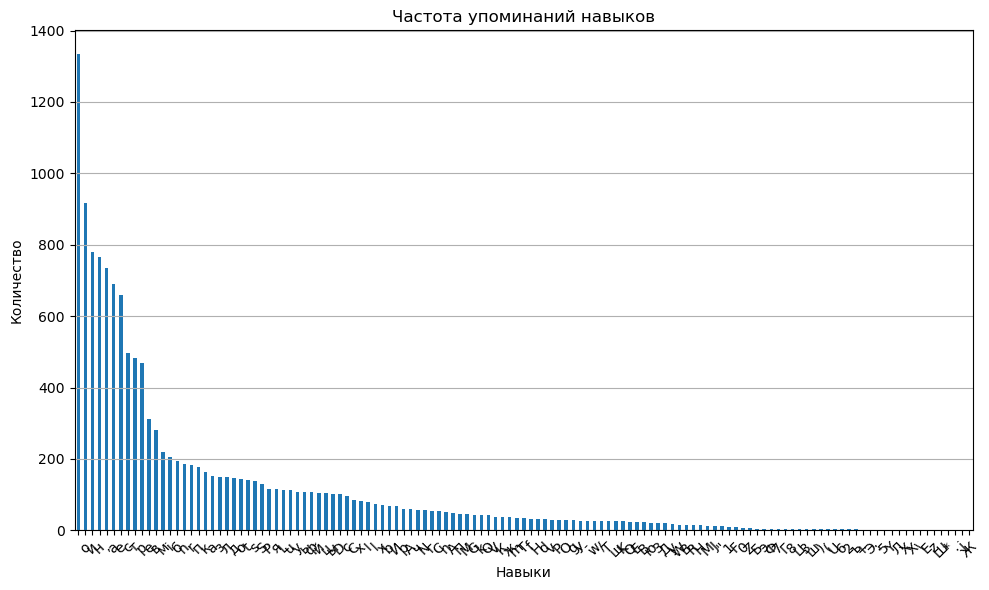

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt




# Подсчитываем частоты
skill_counts = pd.Series().value_counts()

# Строим график
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title('Частота упоминаний навыков')
plt.xlabel('Навыки')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()